In [1]:
from qiskit.quantum_info import Operator
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit.circuit.library import UnitaryGate
import math


In [2]:
def entangle(qc, q1, q2):
    qc.h(q1)
    qc.cx(q1, q2)
    
def bell_basis(qc, q1, q2):
    qc.cx(q1, q2)
    qc.h(q1)
    
def bob_correction(qc, q1, q2, qbob):
    qc.cx(q1, qbob)
    qc.cz(q2, qbob)

In [3]:
def sin_ruido(qc, qubit):
    pass

In [4]:
def amplitude_damping_channel(p):
    def get_angle_for_probability(p):
        return math.asin(math.sqrt(p)) #γ = sin^2(θ)
    
    qc = QuantumCircuit(2)
    angle = get_angle_for_probability(p)
    qc.cry(angle, 0, 1)
    qc.cx(1, 0)
    inst = qc.to_instruction(label='amplitude_damping_channel')
    
    def channel(qc, qubit):
        parent_zero = QuantumRegister(1, name="zero")
        qc.add_register(parent_zero)
        qc.append(inst, [qubit, parent_zero])
    return channel

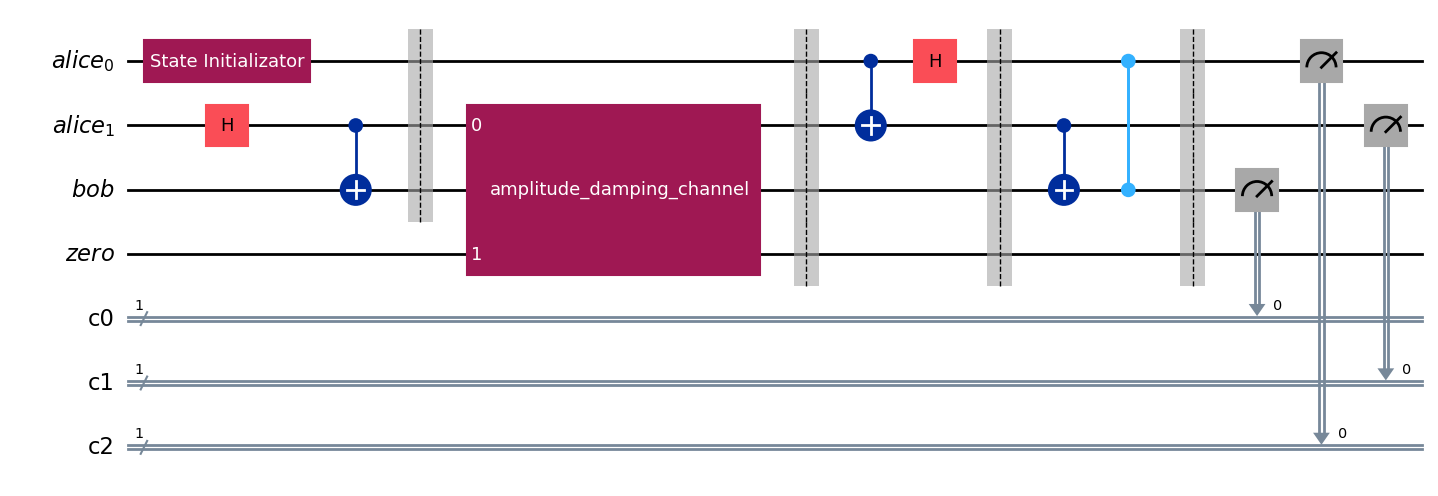

In [5]:
alice_reg = QuantumRegister(2, name="alice")
bob_reg = QuantumRegister(1, name="bob")
qc = QuantumCircuit(alice_reg, bob_reg)
bob_class_reg = ClassicalRegister(1)
qc.add_register(bob_class_reg)
alice_bell_class_reg = ClassicalRegister(1)
qc.add_register(alice_bell_class_reg)
alice_psi_class_reg = ClassicalRegister(1)
qc.add_register(alice_psi_class_reg)

qc.append(UnitaryGate(Operator.from_label("I").data, label='State Initializator'), [alice_reg[0]])

entangle(qc, alice_reg[1], bob_reg[0])
qc.barrier()
amplitude_damping_channel(0.5)(qc, alice_reg[1])
sin_ruido(qc, bob_reg[0])
qc.barrier()
bell_basis(qc, alice_reg[0], alice_reg[1])
qc.barrier()
bob_correction(qc, alice_reg[1], alice_reg[0], bob_reg[0])
qc.barrier()

#basis_change(qc, bob_reg[0])

qc.measure(bob_reg[0], bob_class_reg)
qc.measure(alice_reg[0], alice_psi_class_reg)
qc.measure(alice_reg[1], alice_bell_class_reg)

qc.draw('mpl')